# All Code file

This file is to run and test all our code. It is supposed to run on collab.

# Part 1

Importing libraries and modules.

In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import seaborn as sns
from xgboost import XGBClassifier


# Remove comment and run cell to install transformers pytorch-lightning
# !pip install transformers datasets pytorch-lightning

Creating pipelines and evaluating the functions

In [ ]:
def create_and_train_pipeline(classifier, X_train, y_train):
    pipe = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', classifier()),
    ])

    pipe.fit(X_train, y_train)
    return pipe


def evaluate_clf(clf, X_test, y_test, labels, full=False):
    predicted = clf.predict(X_test)
    if full:
        return classification_report(y_test, predicted, target_names=labels)
    else:
        return np.mean(y_test == predicted)

Importing the data set and basic formatting. Then splitting the data into a training and testing set.

In [200]:
url = "https://raw.githubusercontent.com/Makxxx/data_dmmlProject/main/training_data.csv"
data = pd.read_csv(url, index_col=0, dtype=str)
data.sentence = data.sentence.apply(lambda s: s.replace("'", ' ')) # Removing apostrophes
labels = data.difficulty.unique() # Adding the difficulty labels in an np.array
num_labels = len(labels)
data.difficulty = LabelEncoder().fit_transform(data.difficulty)
#-------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(data.sentence, data.difficulty, random_state=0,test_size=0.2)

In [201]:
type(labels)

numpy.ndarray

## 1. Train your models
Set your X and y variables.
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.


### 1.2 Baseline
What is the baseline for this classification problem ?

In [203]:
base_rate = y_train.value_counts(normalize=True)
base_rate

#### 1.3 Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [204]:
lr_clf = create_and_train_pipeline(LogisticRegression, X_train, y_train)

Calculate accuracy, precision, recall and F1 score on the test set.

In [205]:
print("logistic", evaluate_clf(lr_clf, X_test, y_test, labels, full=True))

logistic               precision    recall  f1-score   support

          C1       0.53      0.58      0.55       161
          A1       0.41      0.37      0.39       164
          B1       0.43      0.40      0.42       160
          A2       0.43      0.46      0.44       144
          B2       0.51      0.42      0.46       173
          C2       0.48      0.58      0.53       158

    accuracy                           0.47       960
   macro avg       0.46      0.47      0.46       960
weighted avg       0.47      0.47      0.46       960



In [206]:
Xtestpred_lr = lr_clf.predict(X_test)

# Accuracy of test set
accuracy_test_lr = accuracy_score(y_test, Xtestpred_lr)
print("Accuracy Score : ", accuracy_test_lr)

# Precision of test set
precision_test_lr = precision_score(y_test, Xtestpred_lr, average='macro')
print("Precision Score : ", precision_test_lr)

# Recall of test set
recall_lr = recall_score(y_test, Xtestpred_lr, average='macro')
print("Recall Score : ", recall_lr)

# f1 Score of test set
f1score_lr = f1_score(y_test, Xtestpred_lr, average='macro')
print("f1 Score : ", f1score_lr)

Accuracy Score :  0.4666666666666667
Precision Score :  0.46449602390336936
Recall Score :  0.46767842372574114
f1 Score :  0.4640138012889838


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

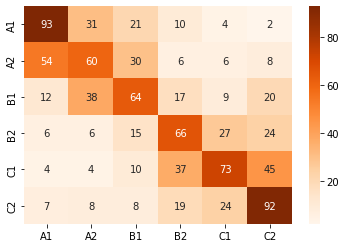

In [207]:
ID_TO_LABEL = dict(zip(range(6), ('A1', 'A2', 'B1', 'B2', 'C1', 'C2',)))
label_names = list(ID_TO_LABEL.values())

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, Xtestpred_lr), label_names, label_names), annot=True, cmap='Oranges', fmt='.5g');


In [208]:
# What sentences are missclassified ?
test_sent = np.array(X_test)
test_array = np.array(y_test)
pred_array = np.array(Xtestpred_lr)
wrong_predictions = list()
for i in range(0, 50):
  if pred_array[i] != test_array[i]:
     wrong_predictions.append([test_sent[i], test_array[i], pred_array[i]])
wrong_predictions[:5]

[['C est en décembre 1967, après bien des invectives au Parlement, que sa loi relative à la régulation des naissances, dite loi Neuwirth est votée : elle autorise la vente exclusive des contraceptifs en pharmacie sur ordonnance médicale, avec autorisation parentale pour les mineures',
  4,
  5],
 ['Giscard va pourtant réussir à transformer ce revers en tremplin', 4, 3],
 ['Un choix difficile mais important : le public français écoute souvent les professionnels de Cannes pour choisir le film qu il va aller voir au cinéma.',
  1,
  2],
 ['Le débat porte plutôt sur l utilité d une telle mesure.', 2, 4],
 ['Il faut du temps et du courage pour soigner toute cette ménagerie En plus des animaux, il faut aussi s occuper du potager de mon papy',
  1,
  2]]

#### 1.4 KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [209]:
knn_clf = create_and_train_pipeline(KNeighborsClassifier, X_train, y_train)

In [210]:
print("knn", evaluate_clf(knn_clf, X_test, y_test, labels, full=True))

knn               precision    recall  f1-score   support

          C1       0.28      0.75      0.41       161
          A1       0.24      0.31      0.27       164
          B1       0.28      0.21      0.24       160
          A2       0.40      0.20      0.27       144
          B2       0.66      0.17      0.27       173
          C2       0.54      0.27      0.36       158

    accuracy                           0.32       960
   macro avg       0.40      0.32      0.30       960
weighted avg       0.40      0.32      0.30       960



In [211]:
Xtestpred_knn = knn_clf.predict(X_test)

# Accuracy of test set
accuracy_test_knn = accuracy_score(y_test, Xtestpred_knn)
print("Accuracy Score : ", accuracy_test_knn)

# Precision of test set
precision_test_knn = precision_score(y_test, Xtestpred_knn, average='macro')
print("Precision Score : ", precision_test_knn)

# Recall of test set
recall_knn = recall_score(y_test, Xtestpred_knn, average='macro')
print("Recall Score : ", recall_knn)

# f1 Score of test set
f1score_knn = f1_score(y_test, Xtestpred_knn, average='macro')
print("f1 Score : ", f1score_knn)

Accuracy Score :  0.31875
Precision Score :  0.4006786607204127
Recall Score :  0.31832487503561463
f1 Score :  0.3022264355028889


In [ ]:
# Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, Xtestpred_knn), label_names, label_names), annot=True, cmap='Oranges', fmt='.5g');

#### 1.5 Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [212]:
dt_clf = create_and_train_pipeline(DecisionTreeClassifier, X_train, y_train)

In [213]:
print("dt", evaluate_clf(dt_clf, X_test, y_test, labels, full=True))

dt               precision    recall  f1-score   support

          C1       0.44      0.51      0.47       161
          A1       0.29      0.32      0.31       164
          B1       0.21      0.23      0.22       160
          A2       0.25      0.28      0.26       144
          B2       0.36      0.27      0.31       173
          C2       0.33      0.26      0.29       158

    accuracy                           0.31       960
   macro avg       0.31      0.31      0.31       960
weighted avg       0.31      0.31      0.31       960



In [214]:
Xtestpred_dt = dt_clf.predict(X_test)

# Accuracy of test set
accuracy_test_dt = accuracy_score(y_test, Xtestpred_dt)
print("Accuracy Score : ", accuracy_test_dt)

# Precision of test set
precision_test_dt = precision_score(y_test, Xtestpred_dt, average='macro')
print("Precision Score : ", precision_test_dt)

# Recall of test set
recall_dt = recall_score(y_test, Xtestpred_dt, average='macro')
print("Recall Score : ", recall_dt)

# f1 Score of test set
f1score_dt = f1_score(y_test, Xtestpred_dt, average='macro')
print("f1 Score : ", f1score_dt)

Accuracy Score :  0.31145833333333334
Precision Score :  0.31237121966329484
Recall Score :  0.3111508173857886
f1 Score :  0.3091165406270082


In [ ]:
# Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, Xtestpred_dt), label_names, label_names), annot=True, cmap='Oranges', fmt='.5g');

#### 1.6 Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [215]:
rf_clf = create_and_train_pipeline(RandomForestClassifier, X_train, y_train)

In [216]:
print("rf", evaluate_clf(rf_clf, X_test, y_test, labels, full=True))

rf               precision    recall  f1-score   support

          C1       0.42      0.75      0.53       161
          A1       0.36      0.32      0.34       164
          B1       0.41      0.33      0.36       160
          A2       0.34      0.49      0.41       144
          B2       0.46      0.23      0.31       173
          C2       0.54      0.37      0.44       158

    accuracy                           0.41       960
   macro avg       0.42      0.41      0.40       960
weighted avg       0.42      0.41      0.40       960



In [217]:
Xtestpred_rf = rf_clf.predict(X_test)

# Accuracy of test set
accuracy_test_rf = accuracy_score(y_test, Xtestpred_rf)
print("Accuracy Score : ", accuracy_test_rf)

# Precision of test set
precision_test_rf = precision_score(y_test, Xtestpred_rf, average='macro')
print("Precision Score : ", precision_test_rf)

# Recall of test set
recall_rf = recall_score(y_test, Xtestpred_rf, average='macro')
print("Recall Score : ", recall_rf)

# f1 Score of test set
f1score_rf = f1_score(y_test, Xtestpred_rf, average='macro')
print("f1 Score : ", f1score_rf)

Accuracy Score :  0.409375
Precision Score :  0.42144899047162315
Recall Score :  0.41312880360356696
f1 Score :  0.3973416087901851


In [ ]:
# Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, Xtestpred_rf), label_names, label_names), annot=True, cmap='Oranges', fmt='.5g');

#### 1.7 Any other technique : XGB Classifier

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [218]:
xgb_clf = create_and_train_pipeline(XGBClassifier, X_train, y_train)

In [219]:
print("xgb", evaluate_clf(xgb_clf, X_test, y_test, labels, full=True))

xgb               precision    recall  f1-score   support

          C1       0.40      0.71      0.52       161
          A1       0.31      0.29      0.30       164
          B1       0.37      0.34      0.36       160
          A2       0.36      0.44      0.40       144
          B2       0.40      0.21      0.27       173
          C2       0.49      0.34      0.40       158

    accuracy                           0.39       960
   macro avg       0.39      0.39      0.38       960
weighted avg       0.39      0.39      0.37       960



In [220]:
Xtestpred_xgb = xgb_clf.predict(X_test)

# Accuracy of test set
accuracy_test_xgb = accuracy_score(y_test, Xtestpred_xgb)
print("Accuracy Score : ", accuracy_test_xgb)

# Precision of test set
precision_test_xgb = precision_score(y_test, Xtestpred_xgb, average='macro')
print("Precision Score : ", precision_test_xgb)

# Recall of test set
recall_xgb = recall_score(y_test, Xtestpred_xgb, average='macro')
print("Recall Score : ", recall_xgb)

# f1 Score of test set
f1score_xgb = f1_score(y_test, Xtestpred_xgb, average='macro')
print("f1 Score : ", f1score_xgb)

Accuracy Score :  0.3875
Precision Score :  0.39123699327835576
Recall Score :  0.390837953834549
f1 Score :  0.37571589789692017


In [ ]:
# Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, Xtestpred_xgb), label_names, label_names), annot=True, cmap='Oranges', fmt='.5g');

#### 1.8 Show a summary of your results

In [221]:
summary_testset = {'Accuracy' : [accuracy_test_lr, accuracy_test_knn, accuracy_test_dt, accuracy_test_rf, accuracy_test_xgb],
           'Precision' : [precision_test_lr, precision_test_knn, precision_test_dt, precision_test_rf, precision_test_xgb],
           'Recall' : [recall_lr, recall_knn, recall_dt, recall_rf, recall_xgb],
           'f1_Score' :[f1score_lr, f1score_knn, f1score_dt, f1score_rf, f1score_xgb]}

table = pd.DataFrame(summary_testset, index = ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree classifier', 'Random Forest Classifier', 'XGB Classifier'])

table


,Accuracy,Precision,Recall,f1_Score
Logistic Regression,0.466667,0.464496,0.467678,0.464014
K-Nearest Neighbour,0.318750,0.400679,0.318325,0.302226
Decision Tree classifier,0.311458,0.312371,0.311151,0.309117
Random Forest Classifier,0.409375,0.421449,0.413129,0.397342
XGB Classifier,0.387500,0.391237,0.390838,0.375716


# Lightning Model

In [ ]:
import torch  # GPU optim. + gradient opt.
import pytorch_lightning as pl
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from sklearn.metrics import confusion_matrix, f1_score

class LightningModel(pl.LightningModule):
    def __init__(self, model_name, num_labels, lr, weight_decay, from_scratch=False):
        super().__init__()
        self.save_hyperparameters()
        if from_scratch:
            # Si `from_scratch` est vrai, on charge uniquement la config (nombre de couches, hidden size, etc.) et pas les poids du modèle
            config = AutoConfig.from_pretrained(
                model_name, num_labels=num_labels
            )
            self.model = AutoModelForSequenceClassification.from_config(config)
        else:
            # Cette méthode permet de télécharger le bon modèle pré-entraîné directement depuis le Hub de HuggingFace sur lequel sont stockés de nombreux modèles
            self.model = AutoModelForSequenceClassification.from_pretrained(
                model_name, num_labels=num_labels
            )
        self.lr = lr
        self.weight_decay = weight_decay
        self.num_labels = self.model.num_labels

    def forward(self, batch):
        return self.model(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"]
        )

    def training_step(self, batch):
        out = self.forward(batch)

        logits = out.logits
        # -------- MASKED --------
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(logits.view(-1, self.num_labels), batch["labels"].view(-1))

        # ------ END MASKED ------

        self.log("train/loss", loss)

        return loss

    def validation_step(self, batch, batch_index):
        labels = batch["labels"]
        out = self.forward(batch)

        preds = torch.max(out.logits, -1).indices
        # -------- MASKED --------
        acc = (batch["labels"] == preds).float().mean()
        # ------ END MASKED ------
        self.log("valid/acc", acc)

        f1 = f1_score(batch["labels"].cpu().tolist(), preds.cpu().tolist(), average="macro")
        self.log("valid/f1", f1)

    def predict_step(self, batch, batch_idx):
        """La fonction predict step facilite la prédiction de données. Elle est
        similaire à `validation_step`, sans le calcul des métriques.
        """
        out = self.forward(batch)

        return torch.max(out.logits, -1).indices

    def configure_optimizers(self):
        return torch.optim.AdamW(
            self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay
        )


# Part 2 -  CamemBERT model

> CamemBERT is a state-of-the-art language model for French based on the RoBERTa architecture pretrained on the French subcorpus of the newly available multilingual corpus OSCAR.
> https://camembert-model.fr

### Importing and functions
This cell imports and defines all the important libraries and functions for the Camembert model.

In [ ]:
import pandas as pd
from transformers import AutoTokenizer
from datasets import load_dataset
import seaborn as sns
import torch  # GPU optim. + gradient opt.
from torch.utils.data import DataLoader
import functools
#from LightningModel import LightningModel
import pytorch_lightning as pl
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

# Takes a batch and process the text.
def tokenize_batch(samples, tokenizer):
    text = [sample["sentence"] for sample in samples]
    labels = torch.tensor([sample["label"] for sample in samples])
    str_labels = [sample["difficulty"] for sample in samples]
    # Doc from CamemBERT:
    # The tokenizer handles
    # - Tokenization (amazing right?)
    # - Padding (adding empty tokens so that each example has the same length)
    # - Truncation (cutting samples that are too long)
    # - Special tokens (in CamemBERT, each sentence ends with a special token </s>)
    # - Attention mask (a binary vector which tells the model which tokens to look at. For instance it will not compute anything if the token is a padding token)
    tokens = tokenizer(text, padding="longest", return_tensors="pt")

    return {"input_ids": tokens.input_ids, "attention_mask": tokens.attention_mask, "labels": labels, "str_labels": str_labels, "sentences": text}

# Once the model is trained, this method will return the confusion matrix.
def plot_confusion_matrix(labels, preds, label_names):
    confusion_norm = confusion_matrix(labels, preds.tolist(), labels=list(range(len(label_names))), normalize="true")
    confusion = confusion_matrix(labels, preds.tolist(), labels=list(range(len(label_names))))

    plt.figure(figsize=(16, 14))
    sns.heatmap(
        confusion_norm,
        annot=confusion,
        cbar=False,
        fmt="d",
        xticklabels=label_names,
        yticklabels=label_names,
        cmap="viridis"
    )

### Tokenize and import data
**STEP 1 -  Create the tokenizer for the data**
The AutoTokenizer breaks the text into words and phrases. It also clean the data and preprocess it as our CamemBERT model need.

**STEP 2 - load the data**
We need a total of  3 sets:
1. a train dataset for training the model.
2. a validation dataset for fine tune the result across epochs.
3. a testing set, to evaluate our model once all epochs are completed.

In [ ]:
#Breaking up + cleaning + processing the text
tokenizer = AutoTokenizer.from_pretrained('camembert-base')

# Loading and setting the datasets
dataset = load_dataset('Makxxx/french_CEFR') # stocked in huggingface in a form of a dictionary. It contains all 3 datasets.

pd_dataset = {split_name: split_data.to_pandas() for split_name, split_data in dataset.items()} # Setting up the validation set

train_dataset, test_dataset, val_dataset = dataset.values() #taking the values from the dataset (dictionary) and attributing them to new variables.

num_labels = len(pd_dataset["train"]["label"].unique()) # Saving the number of classes from the dataset

### Visualize data

You can find here plots and prints to better understand the data.

In [ ]:
# This plot shows the labels and their frequencies

sns.set_theme()

nb_labels = len(pd_dataset["train"]["label"].unique())
print(f"Le dataset comprend {nb_labels} labels.")

ax = pd_dataset["train"]["label"].hist(density=True, bins=nb_labels)
ax.set_xlabel("Label ID")
ax.set_ylabel("Fréquence")
ax.set_title("Répartition des labels dans le dataset (train split)")
ax.figure.show()

In [ ]:
# This graph shows the length of senteces (number of characters).

pd_dataset["train"]["len_sen"] = pd_dataset["train"]["sentence"].apply(lambda x: len(x))
ax = pd_dataset["train"]["len_sen"].hist(density=True, bins=50)
ax.set_xlabel("Longueur")
ax.set_ylabel("Fréquence")
ax.set_title("Nombre de caractères par phrase")
ax.figure.show()

In [ ]:
# Some addItionnal information

print("Max lenght of a sentence: ", pd_dataset["train"]["len_sen"].max())
print("Number of rows in the training set: ", train_dataset.shape[0])
print("Number of rows in the testing set: ", test_dataset.shape[0])
print("Number of rows in the validation set: ", val_dataset.shape[0])

### Load the DATA in the batches and define parameters.
the Dataloader has 4 parameters:
- The dataset.
- Batches are packs of data we inject while training the model to decrease the load on the processor and GPU. The bigger the batch size is, the faster the training is supposed to go. In case the batch size is big, the hardware must have enough memory to load the data.
- shuffle: move data around to prevent the model to remember the exact dataset to prevent the data to be too specific to the dataset rendering it useless for other ones.
- collate_fn: tells how to put together the data into the batch.

In [ ]:
# link the dataset to the different models. We set up the batch and random parameters.
train_dataloader = DataLoader(
    dataset["train"],
    batch_size=16,
    shuffle=True,
    collate_fn=functools.partial(tokenize_batch, tokenizer=tokenizer) #uses the function and tokenizer declared above.
)
val_dataloader = DataLoader(
    dataset["validation"],
    batch_size=16,
    shuffle=False,
    collate_fn=functools.partial(tokenize_batch, tokenizer=tokenizer)
)

### Training the model
Creation of LightingModel instance imported from lightning_model file. This is the model that will be used to train the dataset. They have as attributes:
- Model Name (camembert-base).
- Number of labels (num_labels).
- lr as the step the gradient takes every epoch to optimize the solution.
- weight decay which increases generalization. The gradient would depend on it which will decrease the dependence on the training set.

Other parameters:
- max epochs: how many iterations to train the model.
- gpus: number of GPUs running the model.
- callbacks: in case the gradient is not optimizing the result enough, the callbacks would define when to stop it to return the result.


In [ ]:
lightning_model = LightningModel("camembert-base", num_labels, lr=3e-5, weight_decay=2)

model_checkpoint = pl.callbacks.ModelCheckpoint(monitor="valid/acc", mode="max")

camembert_trainer = pl.Trainer(
    max_epochs=25, #how many times iteration on dataset.
    gpus=1,
    callbacks=[
        pl.callbacks.EarlyStopping(monitor="valid/acc", patience=4, mode="max"),
        model_checkpoint,
    ]
)

# fit the model
camembert_trainer.fit(lightning_model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

# recover best model we found, usually between 5-10.
lightning_model = LightningModel.load_from_checkpoint(checkpoint_path=model_checkpoint.best_model_path)


### Analysing training results.
For now, we only compared the training set to the evaluation one. In this section, we continue to compared them together. We will look at:
- The Confusion matrix
- Examples of wrong classifications.

First, we ecode the classification classes. This would be useful once we want to look at which sentence is wrongly classified.
We also add the classes names to a list to use them easily.

Secondly, we create the prediction variable.

In [ ]:
ID_TO_LABEL = dict(zip(range(6), ('A1', 'A2', 'B1', 'B2', 'C1', 'C2',)))
label_names = list(ID_TO_LABEL.values())

camembert_preds = camembert_trainer.predict(lightning_model, dataloaders=val_dataloader)
camembert_preds = torch.cat(camembert_preds, -1)

Creating the Confusion Matrix.

In [ ]:
plot_confusion_matrix(dataset["validation"]["label"], camembert_preds, label_names)

Looking at the precision, recall, f1-score for each class and for the model.

In [ ]:
# classification method is defined above to provide the report of relevant metrics.
print(classification_report(dataset["validation"]["label"], camembert_preds, target_names=label_names))

Printing some examples of wrongly classified sentences.

In [ ]:
wrong_preds = camembert_preds.numpy() != np.array(dataset["validation"]["label"])
wrong = dataset["validation"].to_pandas()[['sentence', 'difficulty']][wrong_preds]

preds = pd.Series(camembert_preds.numpy())[wrong_preds].apply(lambda x: ID_TO_LABEL[x])
wrong["preds"] = preds
wrong.columns = ["sentence", "true", "predicted"]
wrong

### Generating final dataframe for submission.

Using the same logic as above, we load the test dataset and predict the outcome taking the trained model.

In [ ]:
#Loading the dataset
test_dataloader = DataLoader(
    dataset["test"],
    batch_size=16,
    shuffle=False,
    collate_fn=functools.partial(tokenize_batch, tokenizer=tokenizer)
)

#Predicts and format using trained model.
preds = camembert_trainer.predict(lightning_model, dataloaders=test_dataloader)
preds = torch.cat(preds, -1)

# format the data for submission
test_df = dataset["test"].to_pandas()
test_df.label = preds.numpy()
test_df.difficulty = test_df.label.apply(lambda x: label_names[x])
test_df.index.name = 'id'
test_df.drop(columns=["sentence", "label"], inplace=True)

#Generate the csv file
test_df.to_csv('preds.csv')